## Homework 3: Machine Learning for Classification

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "bank/bank-full.csv"
df = pd.read_csv(data, sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Filter the dataframe to work on only the features of interest
filter_list = [
    'age', 
    'job', 
    'marital', 
    'education', 
    'balance', 
    'housing',
    'contact', 
    'day', 
    'month', 
    'duration', 
    'campaign', 
    'pdays',
    'previous', 
    'poutcome', 
    'y',
    ]

df = df[filter_list]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.shape

(45211, 15)

In [8]:
# Check for any missing values
df.isna().any()

age          False
job          False
marital      False
education    False
balance      False
housing      False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There seems to be no missing values presented in the features. Let's delve deeper by analyzing the dataset values.

In [10]:
df.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
# Show unique values for each feature
df.apply(lambda x: x.unique())

age          [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...
job          [management, technician, entrepreneur, blue-co...
marital                            [married, single, divorced]
education              [tertiary, secondary, unknown, primary]
balance      [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...
housing                                              [yes, no]
contact                         [unknown, cellular, telephone]
day          [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...
month        [may, jun, jul, aug, oct, nov, dec, jan, feb, ...
duration     [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
campaign     [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays        [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...
previous     [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...
poutcome                    [unknown, failure, other, success]
y                                                    [no, yes]
dtype: object

Notice the `unknown` value presented in some of the categorical features. `unknown` could be a filler for missing values. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [13]:
numerical = list(df.select_dtypes("number").columns)
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
categorical = list(df.select_dtypes("object").columns)
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y']

In [15]:
# Search features with unknown value
keyword = "unknown"
features_with_unknown = []
for feature in df[categorical]:
    unique_values = df[feature].unique()
    if keyword in unique_values:
        features_with_unknown.append(feature)
    print(f"{feature}: {unique_values}")
    print()

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital: ['married' 'single' 'divorced']

education: ['tertiary' 'secondary' 'unknown' 'primary']

housing: ['yes' 'no']

contact: ['unknown' 'cellular' 'telephone']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome: ['unknown' 'failure' 'other' 'success']

y: ['no' 'yes']



In [16]:
print(f"These are the features with 'unknown' value: {features_with_unknown}")

These are the features with 'unknown' value: ['job', 'education', 'contact', 'poutcome']


### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`
- `tertiary`

In [17]:
# Compute the mode for education
df.education.mode()

0    secondary
Name: education, dtype: object

In [18]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

**Ans:** The most frequent observation for `education` is `secondary`. 

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`

In [19]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [20]:
# Create correlation matrix for numerical features
correlation_matrix = df[numerical].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


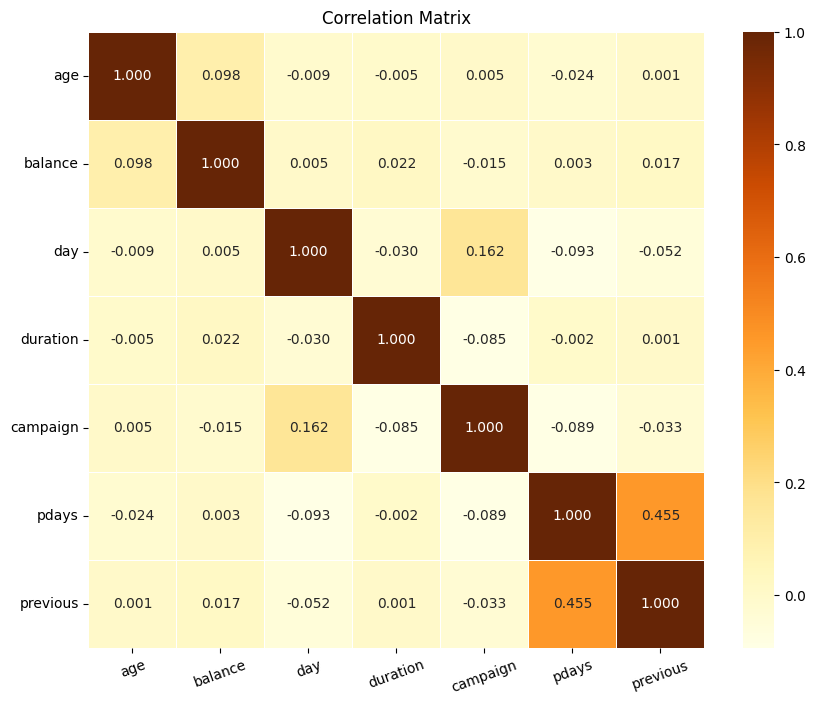

In [21]:
# Plot correlation coefficient between every pair of features on a heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", fmt=".3f", linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=20)
plt.yticks(rotation=0)

plt.show()

In [22]:
unstacked_corr_matrix = correlation_matrix.unstack()
unstacked_corr_matrix

age       age         1.000000
          balance     0.097783
          day        -0.009120
          duration   -0.004648
          campaign    0.004760
          pdays      -0.023758
          previous    0.001288
balance   age         0.097783
          balance     1.000000
          day         0.004503
          duration    0.021560
          campaign   -0.014578
          pdays       0.003435
          previous    0.016674
day       age        -0.009120
          balance     0.004503
          day         1.000000
          duration   -0.030206
          campaign    0.162490
          pdays      -0.093044
          previous   -0.051710
duration  age        -0.004648
          balance     0.021560
          day        -0.030206
          duration    1.000000
          campaign   -0.084570
          pdays      -0.001565
          previous    0.001203
campaign  age         0.004760
          balance    -0.014578
          day         0.162490
          duration   -0.084570
        

In [23]:
# Find the feature pair with the highest correlation
unstacked_corr_matrix.abs()[unstacked_corr_matrix.lt(1)].idxmax()

('pdays', 'previous')

**Ans:** `pdays` and `previous` have the biggest correlation.

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [24]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [25]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [26]:
df.y == 'yes'

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y, Length: 45211, dtype: bool

In [27]:
# Replace yes/no with 1/0
df = df.assign(y = (df.y == 'yes').astype(int))
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [28]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
duration,261,151,76,92,198,139,217,380,50,55,...,226,224,266,300,386,977,456,1127,508,361


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [29]:
df.shape

(45211, 15)

In [30]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [31]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(27126, 9042, 9043)

In [32]:
# Verify the size adds up
df_train.shape[0] + df_val.shape[0] + df_test.shape[0], df.shape[0]

(45211, 45211)

In [33]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20326,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
24301,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
38618,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
18909,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
23081,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0


In [34]:
df_full_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3344,41,blue-collar,married,primary,849,yes,unknown,15,may,72,1,-1,0,unknown,0
17965,49,technician,married,primary,1415,yes,cellular,30,jul,269,2,-1,0,unknown,0
18299,42,admin.,married,secondary,3842,no,cellular,31,jul,130,4,-1,0,unknown,0
10221,37,management,single,tertiary,-119,yes,unknown,11,jun,375,11,-1,0,unknown,0
32192,56,blue-collar,married,primary,3498,no,cellular,15,apr,264,2,-1,0,unknown,1


In [35]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0


In [37]:
y_full_train = df_full_train.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

# Delete the target value y from dataframe
del df_full_train['y']
del df_train['y']
del df_val['y']
del df_test['y']

In [38]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((36168, 14), (27126, 14), (9042, 14), (9043, 14))

In [39]:
df_train.head().T

,0,1,2,3,4
age,32,38,49,37,31
job,technician,entrepreneur,blue-collar,housemaid,self-employed
marital,single,married,married,married,married
education,tertiary,secondary,secondary,primary,tertiary
balance,1100,0,3309,2410,3220
housing,yes,yes,yes,no,no
contact,cellular,cellular,cellular,cellular,cellular
day,11,17,15,4,26
month,aug,nov,may,aug,aug
duration,67,258,349,315,74


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`


In [40]:
from sklearn.metrics import mutual_info_score

In [41]:
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y']

In [42]:
categorical.pop()
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [43]:
def mutual_info_churn_score(series):
    return round(mutual_info_score(series, y_train), 2)

In [44]:
# Calculate mutual information score for all categorical variables
mutual_info = df_train[categorical].apply(mutual_info_churn_score)

# Sort the result such that the most important features come first
mutual_info.sort_values(ascending=False)

poutcome     0.03
month        0.03
job          0.01
contact      0.01
housing      0.01
education    0.00
marital      0.00
dtype: float64

In [45]:
options = ['contact', 'education', 'housing', 'poutcome']
max_var, max_score = None, float('-inf')

for var, score in mutual_info.items():
    if var in options and score > max_score:
        max_var = var
        max_score = score

print(f"{max_var}: {max_score}")

poutcome: 0.03


**Ans:** Among the four options, `poutcome` has the biggest mutual information score. 

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9


**Ans:** `0.9`

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.

**Ans:** `previous`

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.


**Ans:** 0.1

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one